# Séries Temporais

Os dados foram extraídos do site https://www.seade.gov.br/coronavirus/, mas foram disponibilizados para os alunos em https://github.com/alura-cursos/Prophet_covid/tree/main

Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np

Leitura dos dados

In [2]:
dados = pd.read_csv("https://github.com/cmattosr/bootcampDS_Mod03/raw/main/dados/dados_covid_sp.zip", sep=";")
dados

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286173,Ignorado,9999999,8,5,2021-05-08,820,116,"0,000000e+00","10,0000000",5,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",18
286174,Ignorado,9999999,9,5,2021-05-09,756,-64,"0,000000e+00","7,8571429",16,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286175,Ignorado,9999999,10,5,2021-05-10,703,-53,"0,000000e+00","3,8571429",9,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286176,Ignorado,9999999,11,5,2021-05-11,744,41,"0,000000e+00","4,4285714",3,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19


In [3]:
#mudando o campo "datahora" para o formato de data
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

Configurações dos gráficos

In [4]:
mpl.rcParams["font.size"] = 18
mpl.rcParams["figure.figsize"] = (15,8)

<AxesSubplot:xlabel='datahora', ylabel='casos'>

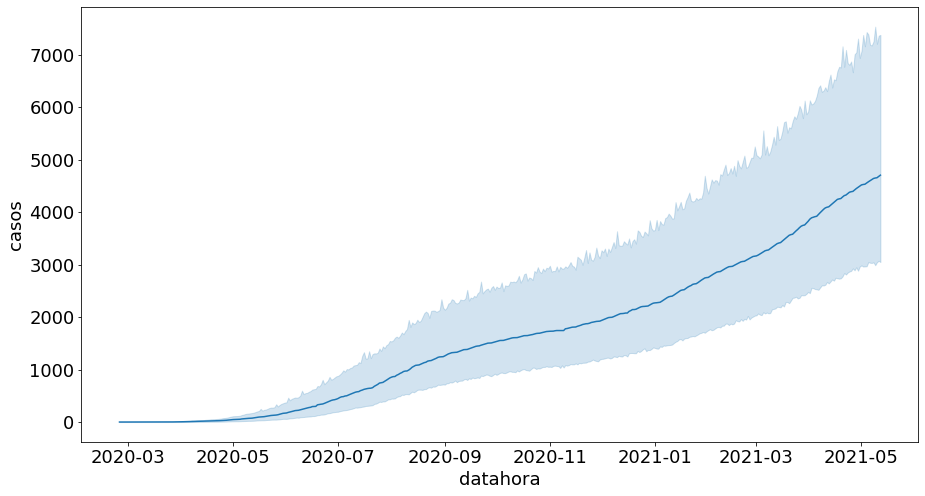

In [5]:
#número de casos, vamos utilizar o seaborn
sns.lineplot(x="datahora", y="casos", data=dados)

A linha azul é a média, a região azul clara é a representação entre os menores e os maiores valores de casos (estamos plotando todos os municípios do estado de SP)

$$ e^x $$

<AxesSubplot:>

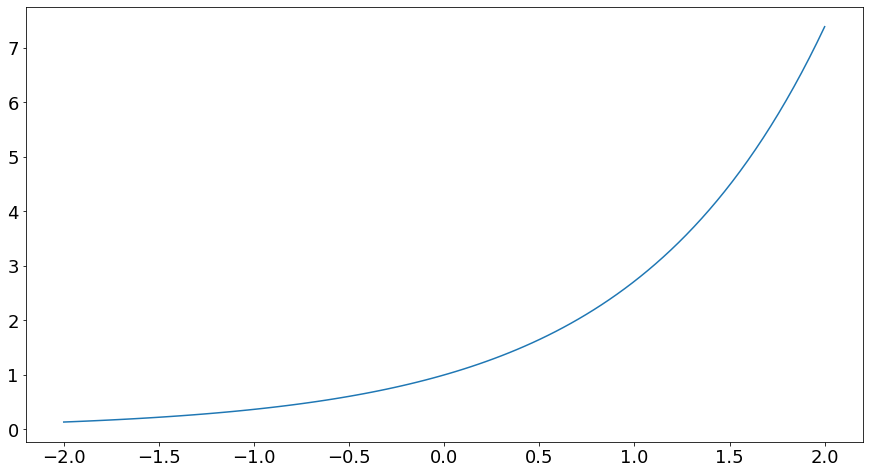

In [6]:
#vamos gerar uma curva exponencial genérica para verificarmos se temos um crescimento exponencial de casos de covid em SP
eixo_x = np.linspace(-2,2,100)
eixo_y_exp = np.exp(eixo_x)
sns.lineplot(x=eixo_x, y=eixo_y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

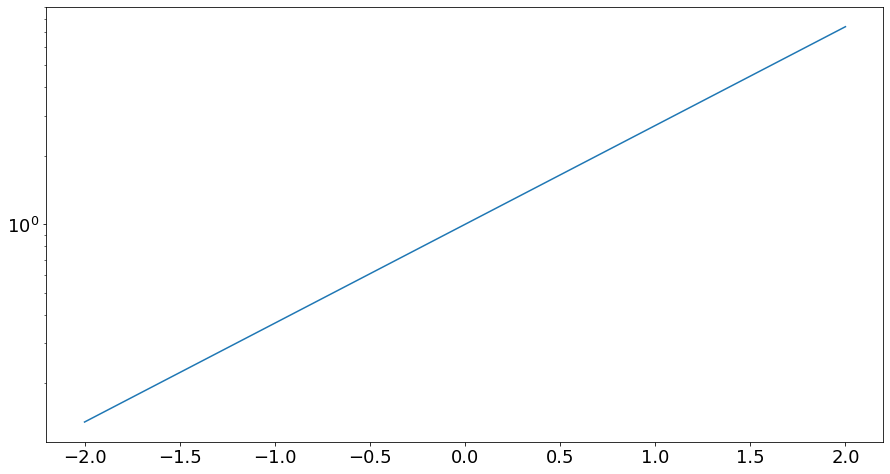

In [7]:
#vamos criar uma linha logarítmica a partir dos dados exponenciais, gerando uma reta
#o nome dessa gráfico é monolog
sns.lineplot(x=eixo_x, y=eixo_y_exp)
mpl.pyplot.yscale("log")

Se gerarmos uma curva logarítmica a partir da linha dos dados (transformação logarítmica)de covid e ela ficar uma reta, quer dizer que temos um crescimento exponencial, conforme o exemplo acima

In [8]:
#vamos fazer somente para o município de São Paulo
dados_sp = dados.query("nome_munic == 'São Paulo'")

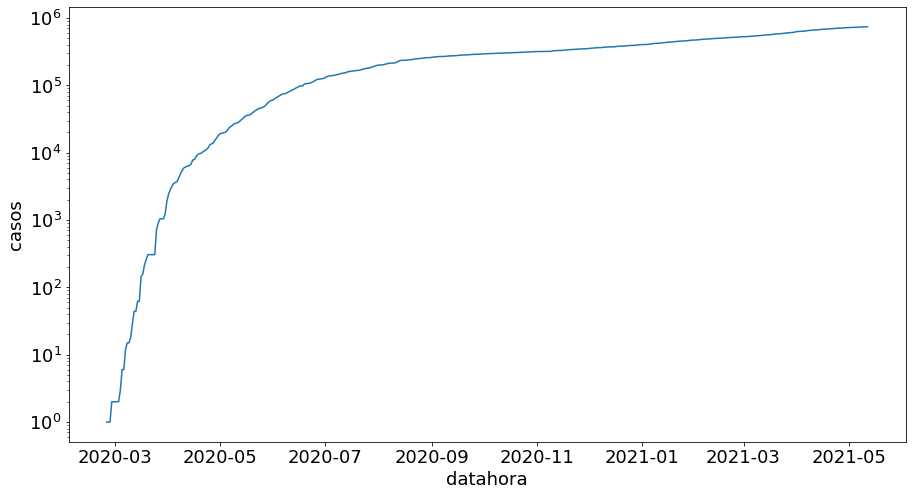

In [9]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

Desafio 01: filtrar a base de dados sem utilizar a função .query

Desafio 02: Escolher outro municípioo para fazer a análise